In [ ]:
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import yfinance as yf
yf.pdr_override()
from pandas_datareader import data as pdr


In [ ]:
df = pdr.get_data_yahoo('GBPUSD=X', start='2000-01-01', end='2015-01-01')


[*********************100%***********************]  1 of 1 completed


In [ ]:
#rows, columns
df.shape

(2879, 6)

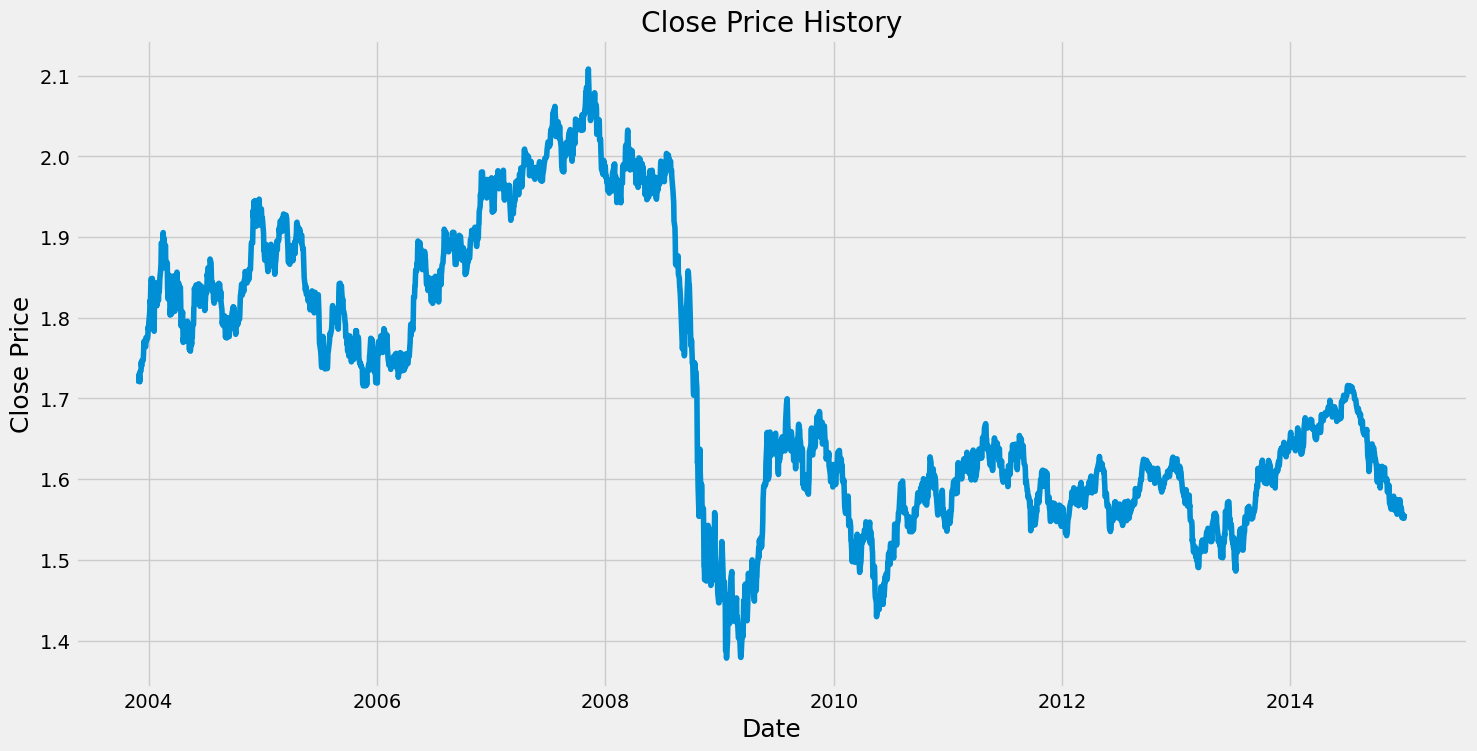

In [ ]:
#visualize closing
plt.figure(figsize=(16, 8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price', fontsize=18)
plt.show()

In [ ]:
#Make new dataframe with only close column
data = df.filter(['Close'])
data = data[6::7]
#Convert to numpy array
dataset = data.values
#get number of rows to train on
training_data_len = math.ceil(len(dataset) * .8)

training_data_len



329

In [ ]:
#Scale data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.51843087],
       [0.55466349],
       [0.55960182],
       [0.62088218],
       [0.59430921],
       [0.63347989],
       [0.64696492],
       [0.7213965 ],
       [0.69806738],
       [0.6599646 ],
       [0.61439652],
       [0.60701762],
       [0.6293769 ],
       [0.58127274],
       [0.55777537],
       [0.5895987 ],
       [0.53952582],
       [0.58395091],
       [0.64424709],
       [0.62088218],
       [0.6268366 ],
       [0.62444228],
       [0.68345894],
       [0.6520342 ],
       [0.62697751],
       [0.63518163],
       [0.64186795],
       [0.58891439],
       [0.57787617],
       [0.58408744],
       [0.61509467],
       [0.5709303 ],
       [0.59256916],
       [0.63546514],
       [0.67299753],
       [0.67978307],
       [0.72807962],
       [0.80112605],
       [0.78171478],
       [0.78668754],
       [0.71675822],
       [0.69563779],
       [0.68675155],
       [0.71233679],
       [0.71912571],
       [0.74632258],
       [0.77025079],
       [0.755

In [ ]:
#Create the training data set
#Create the scaled training dataset

train_data = scaled_data[0:training_data_len, :]
#Split data into x_train and y_train
x_train = []
y_train = []

for i in range(60, len(train_data)):
  x_train.append(train_data[i - 60:i, 0])
  y_train.append(train_data[i, 0])
  if i <= 61:
    print(x_train)
    print(y_train)
    print()

[array([0.51843087, 0.55466349, 0.55960182, 0.62088218, 0.59430921,
       0.63347989, 0.64696492, 0.7213965 , 0.69806738, 0.6599646 ,
       0.61439652, 0.60701762, 0.6293769 , 0.58127274, 0.55777537,
       0.5895987 , 0.53952582, 0.58395091, 0.64424709, 0.62088218,
       0.6268366 , 0.62444228, 0.68345894, 0.6520342 , 0.62697751,
       0.63518163, 0.64186795, 0.58891439, 0.57787617, 0.58408744,
       0.61509467, 0.5709303 , 0.59256916, 0.63546514, 0.67299753,
       0.67978307, 0.72807962, 0.80112605, 0.78171478, 0.78668754,
       0.71675822, 0.69563779, 0.68675155, 0.71233679, 0.71912571,
       0.74632258, 0.77025079, 0.75597817, 0.69252068, 0.70373677,
       0.72919662, 0.75706665, 0.72833343, 0.68562021, 0.63716959,
       0.6097044 , 0.61383793, 0.63532339, 0.581953  , 0.53470984])]
[0.512193277973189]

[array([0.51843087, 0.55466349, 0.55960182, 0.62088218, 0.59430921,
       0.63347989, 0.64696492, 0.7213965 , 0.69806738, 0.6599646 ,
       0.61439652, 0.60701762, 0.6293

In [ ]:
#Convert x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)
x_train.shape

(269, 60)

In [ ]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(269, 60, 1)

In [ ]:
#build model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [ ]:
#Compile
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
#Train
model.fit(x_train, y_train, batch_size=1, epochs=10)


Epoch 1/10
269/269 [==============================] - 8s 18ms/step - loss: 0.0217
Epoch 2/10
269/269 [==============================] - 6s 23ms/step - loss: 0.0064
Epoch 3/10
269/269 [==============================] - 5s 18ms/step - loss: 0.0053
Epoch 4/10
269/269 [==============================] - 5s 18ms/step - loss: 0.0054
Epoch 5/10
269/269 [==============================] - 5s 20ms/step - loss: 0.0047
Epoch 6/10
269/269 [==============================] - 5s 18ms/step - loss: 0.0042
Epoch 7/10
269/269 [==============================] - 5s 20ms/step - loss: 0.0046
Epoch 8/10
269/269 [==============================] - 5s 18ms/step - loss: 0.0043
Epoch 9/10
269/269 [==============================] - 5s 20ms/step - loss: 0.0033
Epoch 10/10
269/269 [==============================] - 5s 18ms/step - loss: 0.0031


In [ ]:
#Create the testing dataset
#Create a new array containing scaled values
test_data = scaled_data[training_data_len - 60: , :]
#Create datasets x_test y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])



In [ ]:
#convert data to numpy array

x_test = np.array(x_test)

In [ ]:
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [ ]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)


3/3 [==============================] - 1s 10ms/step


In [ ]:
#evaluate root mean squared error
rmse=np.sqrt(np.mean(((predictions- y_test)**2)))
rmse

0.02127642684875982

<ipython-input-350-b6910f952bfe>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


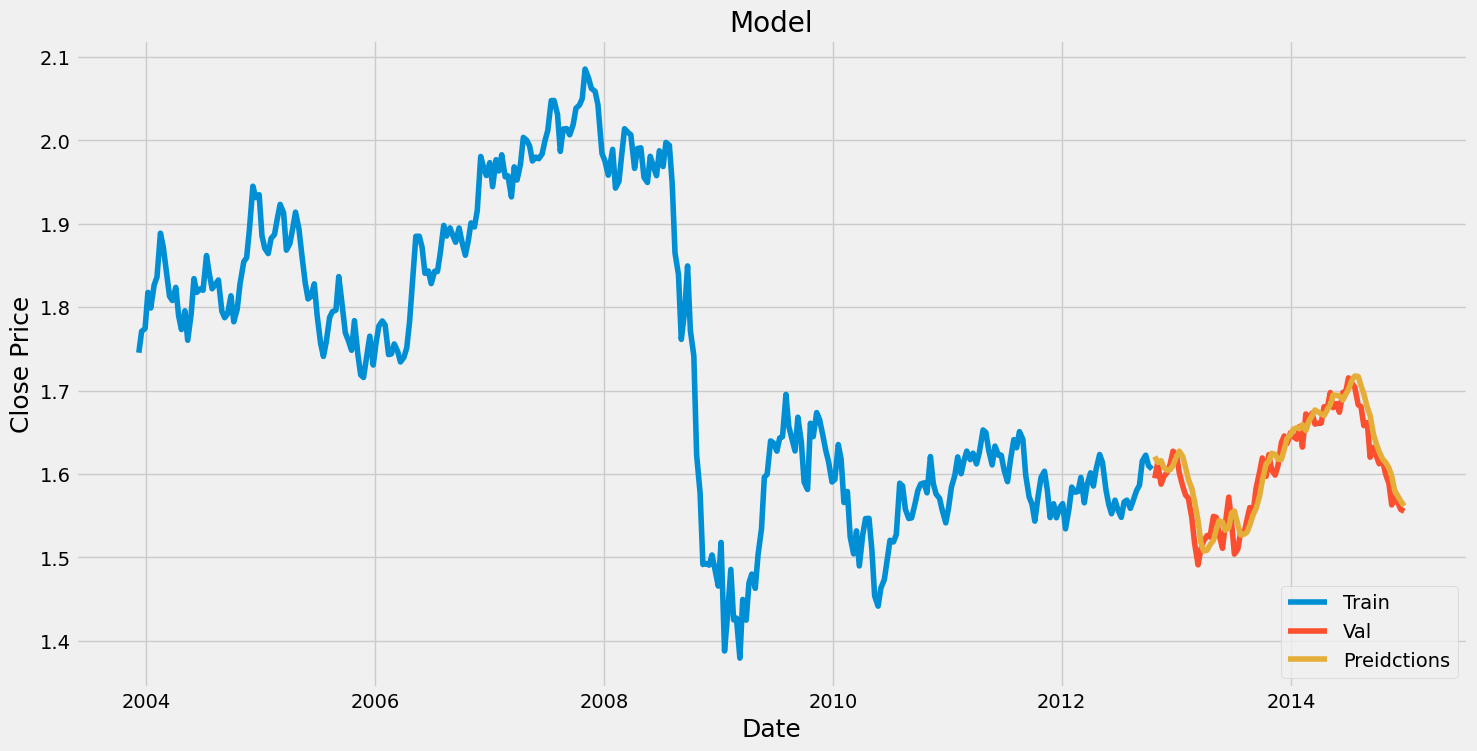

In [ ]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
#visualize
plt.figure(figsize=(16, 8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Preidctions'], loc='lower right')
plt.show()

In [ ]:
quote = pdr.get_data_yahoo('GBPUSD=X', start='2012-01-01', end='2015-01-27')
new_df = quote.filter(['Close'])

new_df.shape


[*********************100%***********************]  1 of 1 completed


(800, 1)

In [ ]:
n = '2015-02-09'

In [ ]:
import datetime

def addWeek(date_str):
    date_obj = datetime.datetime.strptime(date_str, '%Y-%m-%d').date()
    adjusted_date = date_obj + datetime.timedelta(weeks=1)
    adjusted_date_str = adjusted_date.strftime('%Y-%m-%d')
    return adjusted_date_str
def makePredictions(newDate):
  quote = pdr.get_data_yahoo('GBPUSD=X', start='2012-01-01', end=newDate)
  last = quote.tail(1)['Close'].iloc[0]
  new_df = quote.filter(['Close'])
  last_60_days = new_df[-60:].values
  last_60_days_scaled = scaler.transform(last_60_days)
  X_test = []
  X_test.append(last_60_days_scaled)
  X_test = np.array(X_test)
  X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
  pred_price = model.predict(X_test)
  pred_price = scaler.inverse_transform(pred_price)
  if (pred_price - last) > 0:
    print('Buy')
  if (pred_price - last) < 0:
    print('Sell')
def adjustModel(date):
  df = pdr.get_data_yahoo('GBPUSD=X', start='2000-01-01', end='2015-01-01')
  #Make new dataframe with only close column
  data = df.filter(['Close'])
  data = data[6::7]
  #Convert to numpy array
  dataset = data.values
  #get number of rows to train on
  training_data_len = math.ceil(len(dataset) * .8)



  #Scale data
  scaler = MinMaxScaler(feature_range=(0, 1))
  scaled_data = scaler.fit_transform(dataset)

  scaled_data
    #Create the training data set
  #Create the scaled training dataset

  train_data = scaled_data[0:training_data_len, :]
  #Split data into x_train and y_train
  x_train = []
  y_train = []

  for i in range(60, len(train_data)):
    x_train.append(train_data[i - 60:i, 0])
    y_train.append(train_data[i, 0])
  #Convert x_train and y_train to numpy arrays
  x_train, y_train = np.array(x_train), np.array(y_train)

  x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
  x_train.shape
    #build model
  model = Sequential()
  model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
  model.add(LSTM(50, return_sequences=False))
  model.add(Dense(25))
  model.add(Dense(1))
  #Compile
  model.compile(optimizer='adam', loss='mean_squared_error')
  #Train
  model.fit(x_train, y_train, batch_size=1, epochs=10)
n = addWeek(n)
adjustModel(n)
makePredictions(n)
print(n)


[*********************100%***********************]  1 of 1 completed
Epoch 1/10
269/269 [==============================] - 7s 17ms/step - loss: 0.0215
Epoch 2/10
269/269 [==============================] - 5s 20ms/step - loss: 0.0081
Epoch 3/10
269/269 [==============================] - 5s 18ms/step - loss: 0.0055
Epoch 4/10
269/269 [==============================] - 6s 22ms/step - loss: 0.0051
Epoch 5/10
269/269 [==============================] - 5s 18ms/step - loss: 0.0052
Epoch 6/10
269/269 [==============================] - 5s 18ms/step - loss: 0.0045
Epoch 7/10
269/269 [==============================] - 5s 20ms/step - loss: 0.0041
Epoch 8/10
269/269 [==============================] - 5s 18ms/step - loss: 0.0040
Epoch 9/10
269/269 [==============================] - 5s 20ms/step - loss: 0.0034
Epoch 10/10
269/269 [==============================] - 5s 18ms/step - loss: 0.0031
[*********************100%***********************]  1 of 1 completed
1/1 [==============================] - 0s

In [ ]:
# Define start and end dates
start_date = '2000-01-01'
end_date = '2015-01-01'

# Get the close prices for GBPUSD
df_gbpusd = pdr.get_data_yahoo('GBPUSD=X', start=start_date, end=end_date)
data_gbpusd = df_gbpusd.filter(['Close'])[6::7].values

# Get the close prices for SPX500
df_spx500 = pdr.get_data_yahoo('^GSPC', start=start_date, end=end_date)
data_spx500 = df_spx500.filter(['Close'])[6::7].values

# Combine the two datasets
data_combined = np.concatenate((data_gbpusd, data_spx500), axis=1)

# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data_combined)

# Define training data length
training_data_len = math.ceil(len(data_combined) * .8)

# Create the training data set
train_data = scaled_data[0:training_data_len, :]

# Split data into x_train and y_train
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i - 60:i, :])
    y_train.append(train_data[i, 0])

# Convert x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape x_train for LSTM input
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 2))

# Build the model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 2)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=10)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


ValueError: ignored

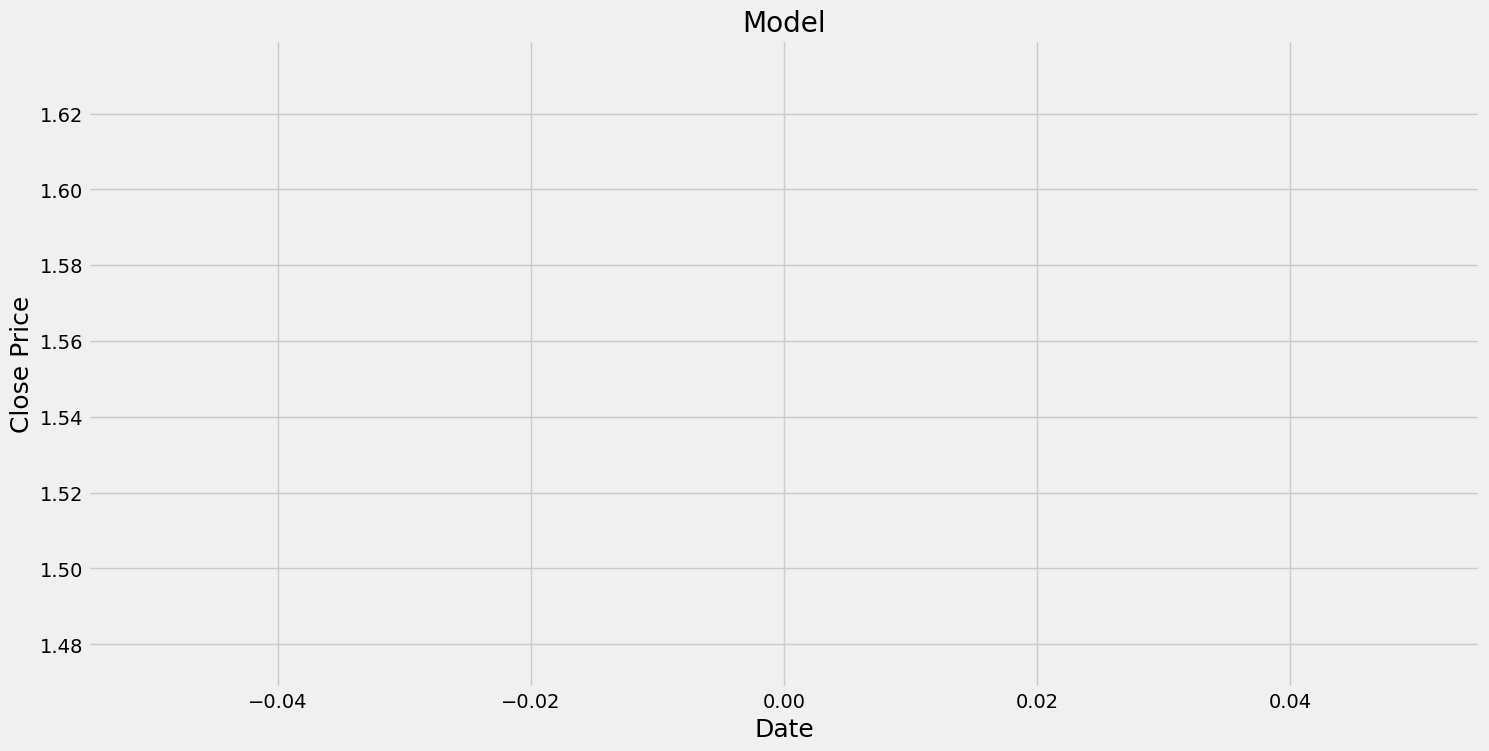

In [ ]:
plt.figure(figsize=(16, 8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price', fontsize=18)
plt.plot(tlist[0])

plt.show()